In [2]:
x = [
    [1.0, 4.0],
    [2.0, 3.5],
    [3.0, 5.0],
    [4.0, 4.5],
    [5.0, 5.0],
    [6.0, 6.0],
    [7.0, 5.5],
    [8.0, 6.5],
    [9.0, 7.0],
    [10.0, 8.0]
]
y = [
    52.0,
    55.5,
    61.0,
    64.0,
    68.0,
    74.0,
    78.0,
    83.5,
    88.0,
    94.0
]


In [3]:
def predictions(features, weight, bias):
    predicted_labels = []
    for i in range(len(features)):
        value = 0
        for j in range(len(weight)):
            value += features[i][j]*weight[j]
        value += bias
        predicted_labels.append(value)
    return predicted_labels

def calc_mse(labels, predicted_labels):
    MSE = 0
    n_samples = len(labels)
    for i in range(n_samples):
        square_error = (labels[i] - predicted_labels[i])**2
        MSE += square_error
    MSE = 1/n_samples * MSE
    return MSE

def gradient_weight(features, labels, predicted_labels, weight):
    n_samples = len(labels)
    total_grad_w = []
    for i in range(len(weight)):
        grad_w = 0
        for j in range(n_samples):
            error= predicted_labels[j]-labels[j]
            grad_w += features[j][i]* error
        grad_w = 2/n_samples * grad_w
        total_grad_w.append(grad_w)

    return total_grad_w

def gradient_bias(labels, predicted_labels):
    n_samples = len(labels)
    grad_b = 0
    for i in range(n_samples):
        error = (predicted_labels[i]-labels[i])
        grad_b += error
    grad_b = 2/n_samples * grad_b
    return grad_b

def update_weight(learning_rate, weight_gradient, weight):
    new_weight = []
    for i in range(len(weight)):
        n_weight = weight[i] - learning_rate * weight_gradient[i]
        new_weight.append(n_weight)
    return new_weight

def update_bias(learning_rate, bias_gradient, bias):
    new_bias = bias - learning_rate * bias_gradient
    return new_bias

def Train(features, labels, weight, bias, learning_rate, epochs):
    loss_history = []
    for i in range(epochs):
        predicted_labels = predictions(features, weight, bias)
        grad_w = gradient_weight(features, labels, predicted_labels, weight)
        grad_b = gradient_bias(labels, predicted_labels)
        weight = update_weight(learning_rate, grad_w, weight)
        bias = update_bias(learning_rate, grad_b, bias)
        MSE = calc_mse(labels, predicted_labels)
        loss_history.append(MSE)
    return weight, bias, loss_history


In [4]:
w = [0,0]
b = 0
lr = 0.001
epochs = 10000

w, b, loss_history = Train(x, y, w, b, lr, epochs)

In [5]:
print(w, b)
y_pred = predictions(x, w, b)
MSE = calc_mse(y, y_pred)
print(MSE)
print(loss_history)

[0.6381493977450698, 9.81279581026735] 13.893955468028437
13.12952612550811
[5333.75, 3985.4609915840006, 2988.665102605062, 2251.6788129368447, 1706.7336207521244, 1303.7379723026588, 1005.6663499883473, 785.1510855167409, 621.9631754740053, 501.15020906048824, 411.66000474149564, 345.3232619384439, 296.10158112315065, 259.5316327679217, 232.31431105333775, 212.0110540434691, 196.81937668265056, 185.40695448680148, 176.7889853779043, 170.23754085165908, 165.21456227781258, 161.32233466074672, 158.26687898340774, 155.83089340976997, 153.85375259087994, 152.21672401605218, 150.83204057839075, 149.63482348729588, 148.57711203428516, 147.6234506537409, 146.7476270687673, 145.93026126941893, 145.15702338945104, 144.41731643767966, 143.70330262978106, 143.0091836946898, 142.33066890804375, 141.66458188535117, 141.0085699403491, 140.36088925511834, 139.72024608697555, 139.08567939532753, 138.45647408437495, 137.83209687572761, 137.2121489080746, 136.59633070077024, 135.98441625629434, 135.37

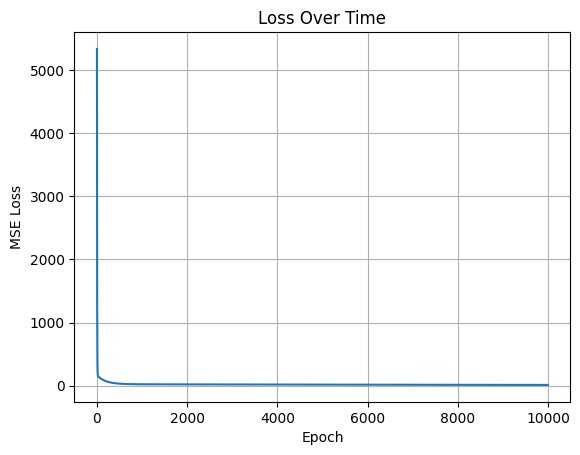

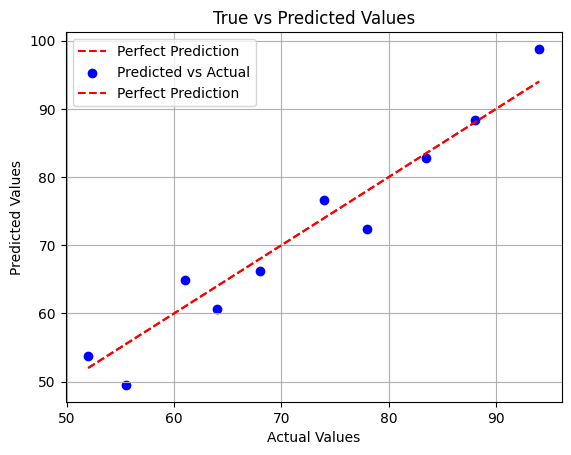

In [6]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Loss Over Time")
plt.grid(True)
plt.show()

y_pred = predictions(x, w, b)
import numpy as np

plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', label='Perfect Prediction')


y_np = np.array(y)
y_pred_np = np.array(y_pred)

plt.scatter(y_np, y_pred_np, color='blue', label='Predicted vs Actual')
plt.plot([y_np.min(), y_np.max()], [y_np.min(), y_np.max()], 'r--', label='Perfect Prediction')


plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

